In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("UCI-datset.csv")
df.head()

,link,Data-Name,data type,default task,attribute-type,instances,attributes,year
0,https://archive.ics.uci.edu/ml/datasets/Abalone,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177.0,8.0,1995.0
1,https://archive.ics.uci.edu/ml/datasets/Adult,Adult,Multivariate,Classification,"Categorical, Integer",48842.0,14.0,1996.0
2,https://archive.ics.uci.edu/ml/datasets/Annealing,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798.0,38.0,NaN
3,https://archive.ics.uci.edu/ml/datasets/Anonym...,Anonymous Microsoft Web Data,Recommender-Systems,Categorical,NaN,37711.0,294.0,1998.0
4,https://archive.ics.uci.edu/ml/datasets/Arrhyt...,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452.0,279.0,1998.0


In [192]:
df.shape
df.info()
df.columns
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link            620 non-null    object 
 1   Data-Name       620 non-null    object 
 2   data type       617 non-null    object 
 3   default task    591 non-null    object 
 4   attribute-type  483 non-null    object 
 5   instances       586 non-null    float64
 6   attributes      557 non-null    float64
 7   year            589 non-null    float64
dtypes: float64(3), object(5)
memory usage: 38.9+ KB


,link,Data-Name,data type,default task,attribute-type,instances,attributes,year
count,620,620,617,591,483,5.860000e+02,5.570000e+02,589.00000
unique,605,605,46,26,8,NaN,NaN,NaN
top,https://archive.ics.uci.edu/ml/datasets/Wikipe...,Wikipedia Math Essentials,Multivariate,Classification,Real,NaN,NaN,NaN
freq,2,2,341,310,215,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.866792e+05,1.821739e+04,2011.42275
std,NaN,NaN,NaN,NaN,NaN,3.796300e+06,1.901265e+05,9.87763
min,NaN,NaN,NaN,NaN,NaN,1.000000e+01,0.000000e+00,1987.00000
25%,NaN,NaN,NaN,NaN,NaN,3.512500e+02,8.000000e+00,2009.00000
50%,NaN,NaN,NaN,NaN,NaN,2.000000e+03,1.900000e+01,2015.00000
75%,NaN,NaN,NaN,NaN,NaN,1.955625e+04,6.500000e+01,2019.00000


In [193]:
df.isna().sum().sort_values(ascending=False)

attribute-type    137
attributes         63
instances          34
year               31
default task       29
data type           3
link                0
Data-Name           0
dtype: int64

In [194]:
(df.isna().sum() / len(df)) * 100

link               0.000000
Data-Name          0.000000
data type          0.483871
default task       4.677419
attribute-type    22.096774
instances          5.483871
attributes        10.161290
year               5.000000
dtype: float64

In [195]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols

Index(['link', 'Data-Name', 'data type', 'default task', 'attribute-type'], dtype='object')

In [196]:
for col in cat_cols:
    print("\n---", col, "---")
    print(df[col].value_counts().head(10))


--- link ---
link
https://archive.ics.uci.edu/ml/datasets/Wikipedia+Math+Essentials                                2
https://archive.ics.uci.edu/ml/datasets/Wave+Energy+Converters                                   2
https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set                              2
https://archive.ics.uci.edu/ml/datasets/Bar+Crawl%3A+Detecting+Heavy+Drinking                    2
https://archive.ics.uci.edu/ml/datasets/Shoulder+Implant+X-Ray+Manufacturer+Classification       2
https://archive.ics.uci.edu/ml/datasets/Exasens                                                  2
https://archive.ics.uci.edu/ml/datasets/Stock+keeping+units                                      2
https://archive.ics.uci.edu/ml/datasets/Monolithic+Columns+in+Troad+and+Mysia+Region             2
https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset                                    2
https://archive.ics.uci.edu/ml/datasets/Unmanned+Aerial+Vehicle+%28UAV%29+Intrusion+Detect

In [197]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['instances', 'attributes', 'year'], dtype='object')

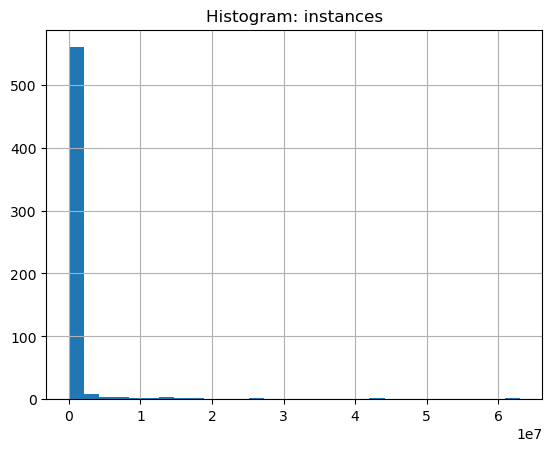

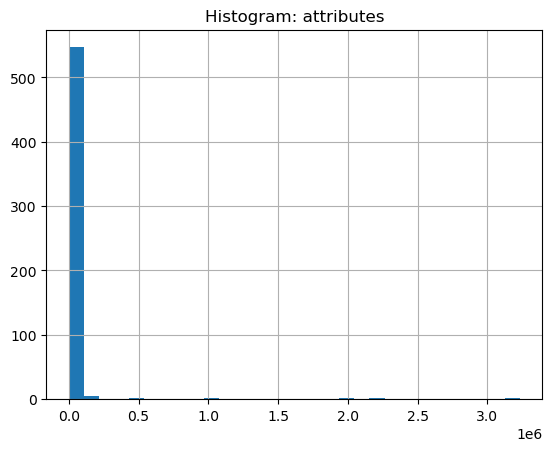

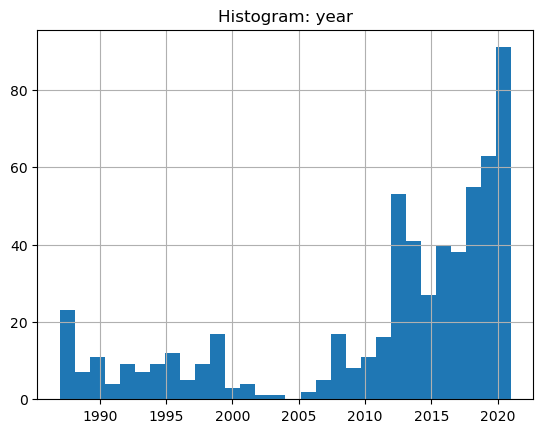

In [198]:
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.show()

In [199]:
data = df.copy()
for col in cat_cols:
    data[col] = data[col].fillna("unknown")

In [200]:
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())


In [201]:
data.isna().sum().sum()

np.int64(0)

In [202]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
data.columns

Index(['link', 'data-name', 'data_type', 'default_task', 'attribute-type',
       'instances', 'attributes', 'year'],
      dtype='object')

In [203]:
data[data["default_task"] == "Classification"].head()
data[data["attributes"] > 10].head()
data["data_type"].value_counts().head(10)

data_type
Multivariate                             341
Multivariate, Time-Series                 65
Text                                      37
Time-Series                               21
Multivariate, Sequential, Time-Series     19
Multivariate, Text                        15
Classification                            14
Univariate                                12
Domain-Theory                             11
Sequential                                10
Name: count, dtype: int64

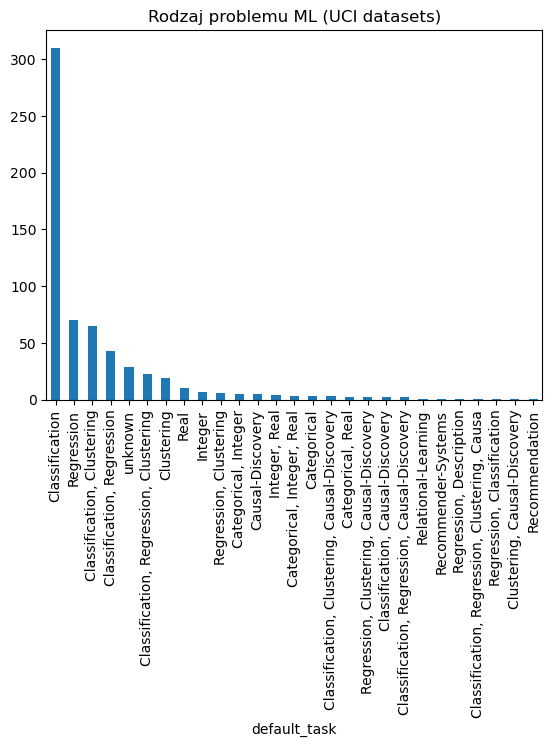

In [204]:
data["default_task"].value_counts().plot(
    kind="bar",
    title="Rodzaj problemu ML (UCI datasets)"
)
plt.show()

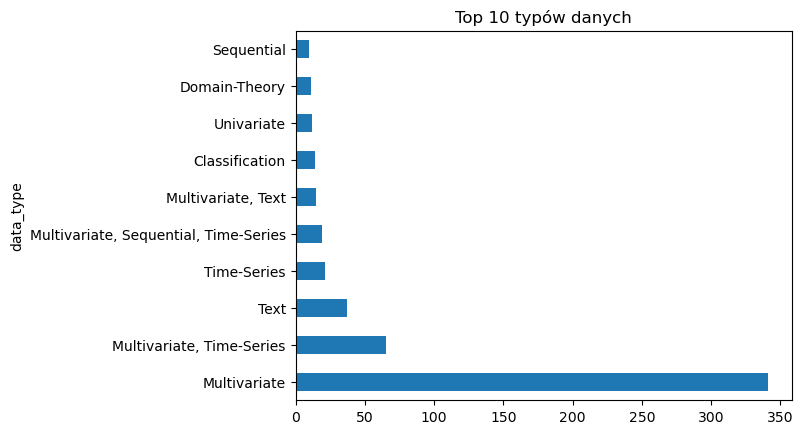

In [205]:
data["data_type"].value_counts().head(10).plot(
    kind="barh",
    title="Top 10 typów danych"
)
plt.show()


In [206]:
data.to_csv("UCI-datset_clean.csv", index=False)